<a href="https://colab.research.google.com/github/lenaaravind18/mageClassification-using-Neural-Network/blob/main/ImageClassification_using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models

In [4]:
(training_images,training_labels),(testing_images,testing_labels)=datasets.cifar10.load_data()
training_images,testing_images=training_images/255,testing_images/255

170508288/170498071 [==============================] - 6s 0us/step


In [5]:
class_names=['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

TypeError: ignored

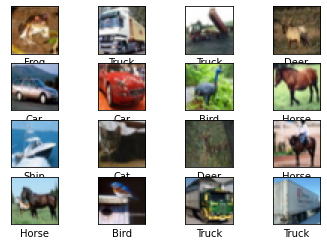

In [6]:
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(training_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[training_labels[i][0]])

plt.imshow()

In [7]:
training_images=training_images[:20000]
training_labels=training_labels[:20000]
testing_images=testing_images[:4000]
testing_labels=testing_labels[:4000]


In [8]:
model= models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(training_images,training_labels,epochs=10,validation_data=(testing_images,testing_labels))

Epoch 1/10
625/625 [==============================] - 26s 40ms/step - loss: 1.7735 - accuracy: 0.3426 - val_loss: 1.4837 - val_accuracy: 0.4577
Epoch 2/10
625/625 [==============================] - 24s 39ms/step - loss: 1.3909 - accuracy: 0.4982 - val_loss: 1.2475 - val_accuracy: 0.5468
Epoch 3/10
625/625 [==============================] - 24s 38ms/step - loss: 1.2321 - accuracy: 0.5615 - val_loss: 1.2059 - val_accuracy: 0.5642
Epoch 4/10
625/625 [==============================] - 24s 39ms/step - loss: 1.1213 - accuracy: 0.6059 - val_loss: 1.2364 - val_accuracy: 0.5663
Epoch 5/10
625/625 [==============================] - 24s 38ms/step - loss: 1.0362 - accuracy: 0.6352 - val_loss: 1.0891 - val_accuracy: 0.6143
Epoch 6/10
625/625 [==============================] - 24s 38ms/step - loss: 0.9406 - accuracy: 0.6694 - val_loss: 1.0274 - val_accuracy: 0.6352
Epoch 7/10
625/625 [==============================] - 24s 38ms/step - loss: 0.8764 - accuracy: 0.6919 - val_loss: 1.0287 - val_accuracy:

In [9]:
loss,accuracy=model.evaluate(testing_images,testing_labels)
print(f"Loss:{loss}")
print(f"Accuracy:{accuracy}")

125/125 [==============================] - 1s 10ms/step - loss: 1.0239 - accuracy: 0.6593
Loss:1.0239306688308716
Accuracy:0.659250020980835


In [10]:
model.save("Image_classifier.model")

INFO:tensorflow:Assets written to: Image_classifier.model/assets


In [ ]:
img=cv2.imread("/bmw-g85c075d78_640.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img,cmap=plt.cm.binary)

prediction=model.predict(np.array([img/255]))
index= np.argmax(prediction)
print(f'Prediction is {class_names[index]}')
plt.show()